## Import required Libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

## Load data from csv file

In [2]:
df1=pd.read_csv('./r-india-Hot 04-13-2020.csv')
df2=pd.read_csv('./r-india-Top 04-13-2020.csv')
df=pd.concat([df1,df2])
df.shape

(1774, 14)

In [7]:
df.head(30)

,Title,Flair,Date Created,Upvotes,Upvote Ratio,ID,Edited?,Is Locked?,NSFW?,Is Spoiler?,Stickied?,URL,Comment Count,Text
0,Coronavirus (COVID-19) Megathread - News and U...,Coronavirus,03-29-2020 08:40:33,370,0.96,fqqdsg,04-11-2020 15:41:22,False,False,False,True,https://www.reddit.com/r/india/comments/fqqdsg...,9269,###[Covid-19 Fundraisers & Donation Links](htt...
2,My favorite lockdown pic so far!,Coronavirus,04-13-2020 06:11:59,3320,0.98,g000ic,False,False,False,False,False,https://i.redd.it/xq8w0na41fs41.jpg,88,NaN
3,Covid-19: Kamal Nath says lockdown was delayed...,Coronavirus,04-13-2020 17:26:58,178,0.88,g0bfmo,False,False,False,False,False,https://scroll.in/latest/958962/covid-19-kamal...,22,NaN
4,"Lost my Job, Sick Mother and Paralysed Dad, In...",AskIndia,04-13-2020 07:12:28,916,0.98,g014wc,04-13-2020 10:41:36,False,False,False,False,https://www.reddit.com/r/india/comments/g014wc...,108,Hi....It's really tough time for everyone. I r...
5,"In Chhattisgarh, 108 Out of 159 “Tableeghis” T...",Coronavirus,04-13-2020 18:08:16,128,0.78,g0c0o9,False,False,False,False,False,https://www.asiannewshub.com/in-chhattisgarh-1...,26,NaN
6,"Behind closed doors, the biggest viruses are m...",Coronavirus,04-13-2020 06:10:34,904,0.95,fzzzji,False,False,False,False,False,https://i.redd.it/dc1v110v0fs41.jpg,127,NaN
7,"New cases increasingly in single digits, how K...",Coronavirus,04-13-2020 19:31:00,64,0.94,g0d4n0,False,False,False,False,False,https://indianexpress.com/article/india/kerala...,2,NaN
8,30 ‘foreigners’ dead in Assam’s detention centres,Politics,04-13-2020 18:02:20,69,0.87,g0bxrr,False,False,False,False,False,https://www.thehindu.com/news/national/30-fore...,9,NaN
9,Hyderabad man working in Dubai under investiga...,Non-Political,04-13-2020 15:44:28,84,0.87,g09sjg,False,False,False,False,False,https://www.thenewsminute.com/article/hyderaba...,38,NaN
10,Punjab: Weapons recovered from Gurudwara where...,Coronavirus,04-13-2020 18:30:44,45,0.87,g0cbyc,False,False,False,False,False,https://www.indiatoday.in/india/story/policema...,5,NaN


In [4]:
#Removing all rows of flairs with frequency less than 10
df=df.groupby('Flair').filter(lambda x : len(x)>10)

In [8]:
flairs= df.groupby(['Flair'])

In [9]:
flairs['Flair'].count()

Flair
AskIndia              123
Business/Finance       24
Coronavirus           393
Food                   26
Non-Political         544
Photography            48
Policy/Economy         48
Politics              386
Science/Technology     23
Sports                 31
Unverified             20
[R]eddiquette          35
Name: Flair, dtype: int64

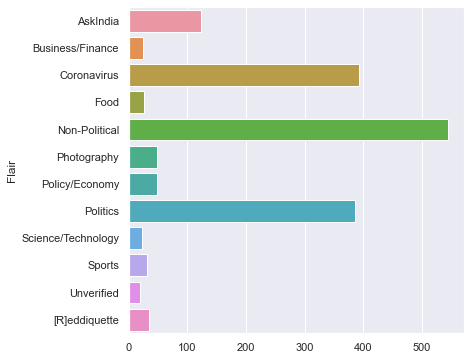

In [10]:
flair_count=flairs['Flair'].count()
plt.figure(0,figsize=(6,6))
sns.barplot(flair_count.values, flair_count.index)

## Upvotes and Comment Count in each Category

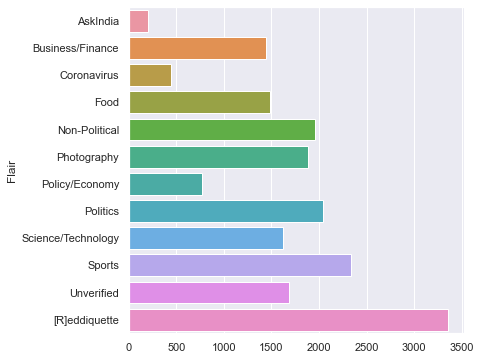

In [11]:
upvotes=flairs['Upvotes'].mean()
plt.figure(1,figsize=(6,6))
sns.barplot(upvotes.values, upvotes.index)

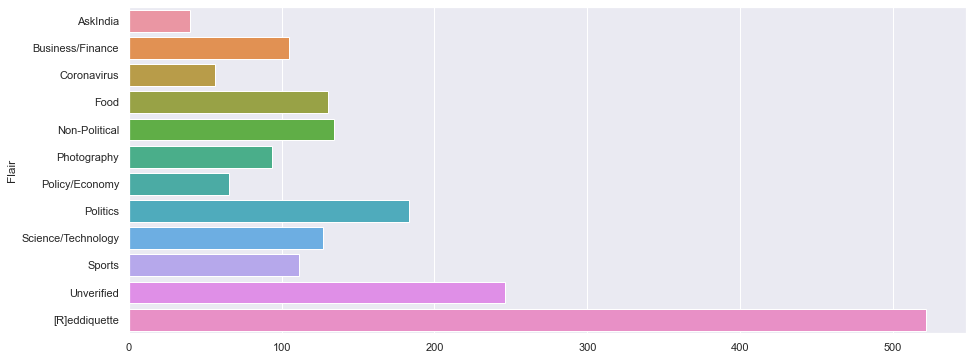

In [12]:
comment_count=flairs['Comment Count'].mean()
plt.figure(2,figsize=(15,6))
splot=sns.barplot(comment_count.values, comment_count.index)
# splot.set(xscale="log")
plt.show()

## Scatter plot for correlation between Comment Count and Upvotes in each post

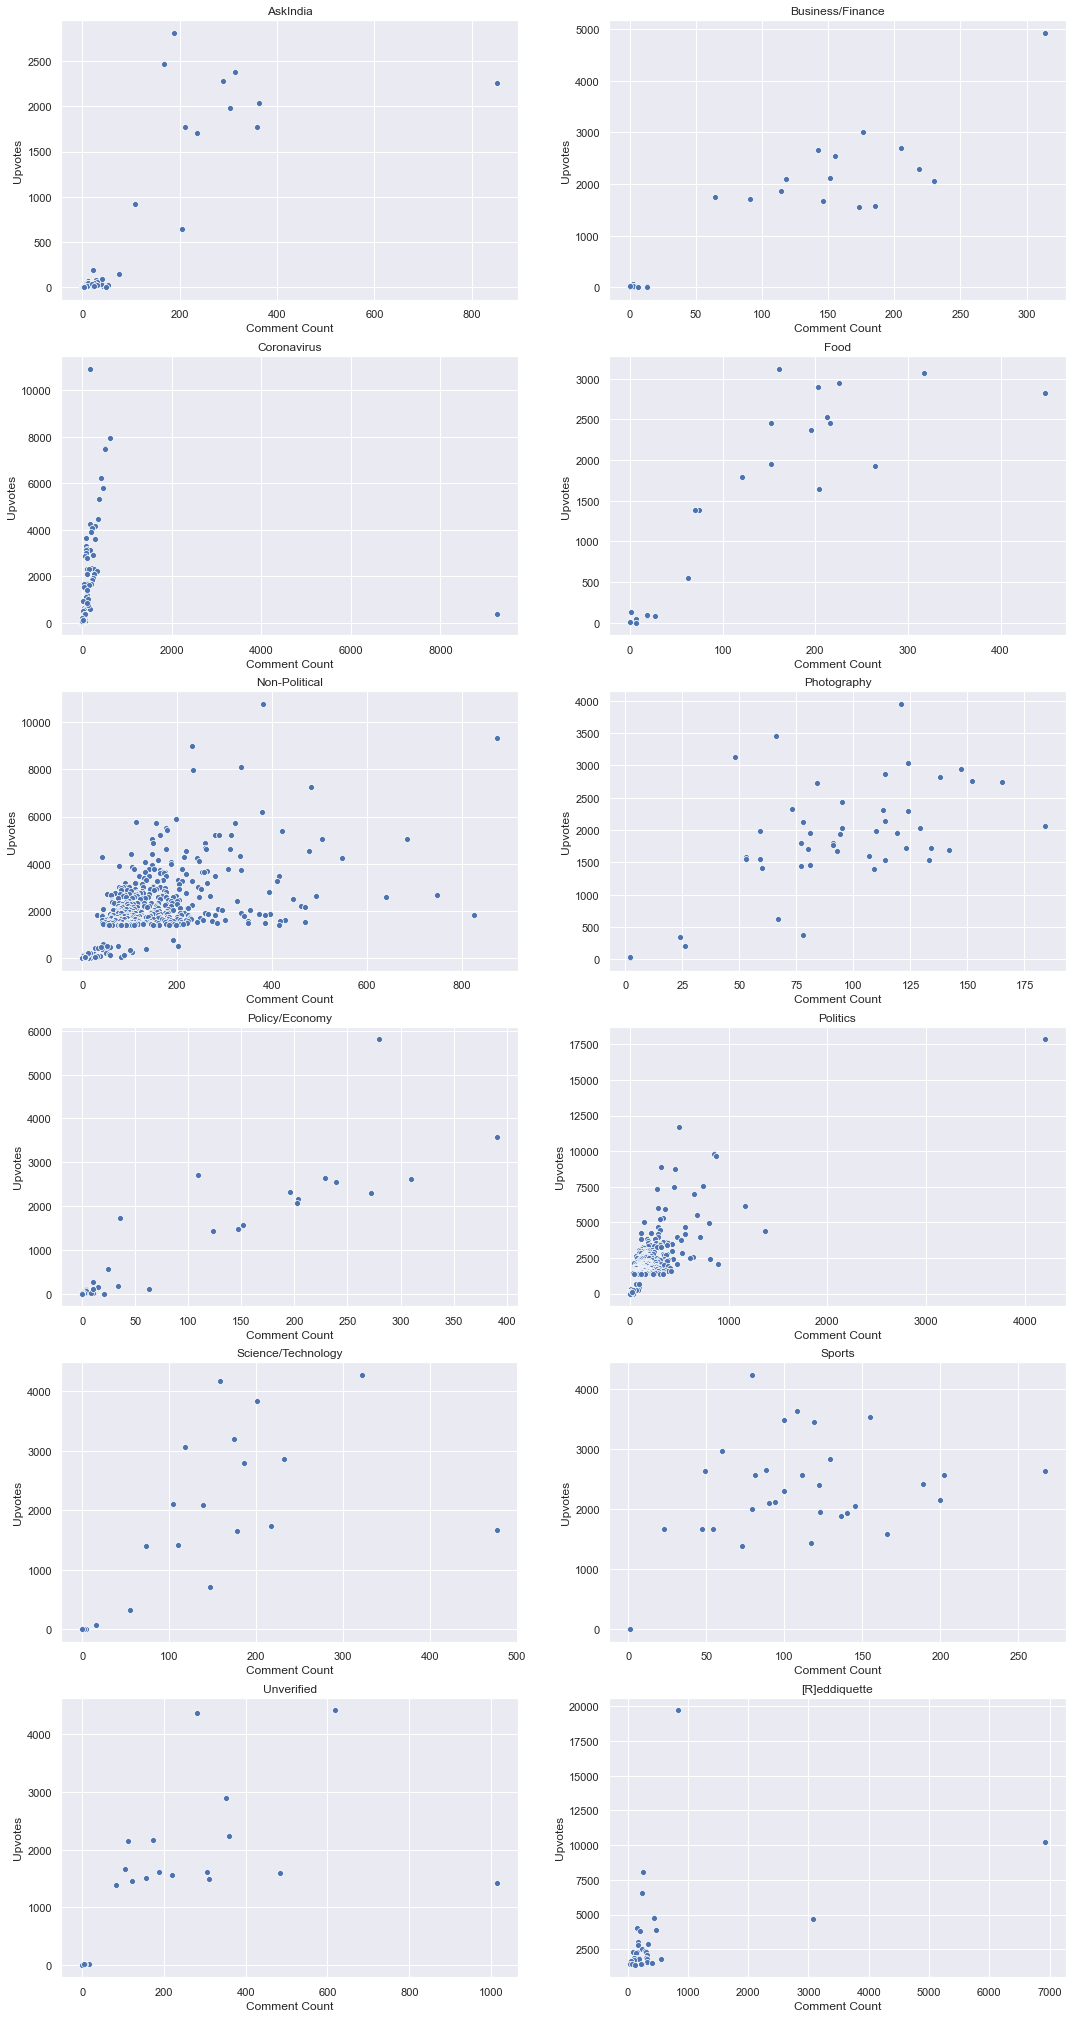

In [184]:
flair_name=list(flairs.groups.keys())
plt.figure(0,figsize=(18,36))
for i in range(len(flairs)):
    plt.subplot(6,2,i+1)
    plt.title(flair_name[i])
    ix=flairs.get_group(flair_name[i])['Comment Count']
    iy=flairs.get_group(flair_name[i])['Upvotes']
    sns.scatterplot(ix,iy)

plt.show()

## Average word count for all posts in each flair

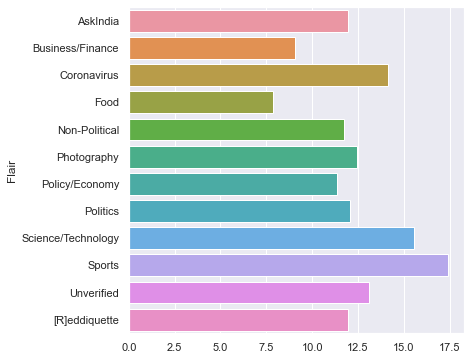

In [87]:
# Words count in title
df['Title_wc']=df['Title'].apply(lambda x:len(list(str(x).split())))
plt.figure(3,figsize=(6,6))
flairs= df.groupby(['Flair'])['Title_wc'].mean()
sns.barplot(flairs.values, flairs.index)

## Top words in all data

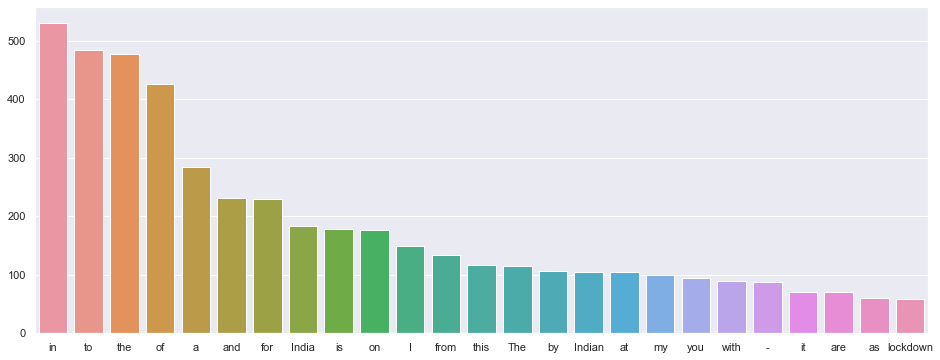

In [26]:
# Top 50 most used words in title
all_word_count=df['Title'].str.split(expand=True).unstack().value_counts()
plt.figure(3,figsize=(16,6))
sns.barplot(all_word_count[:25].index, all_word_count[:25].values)

## Top words in each flair category

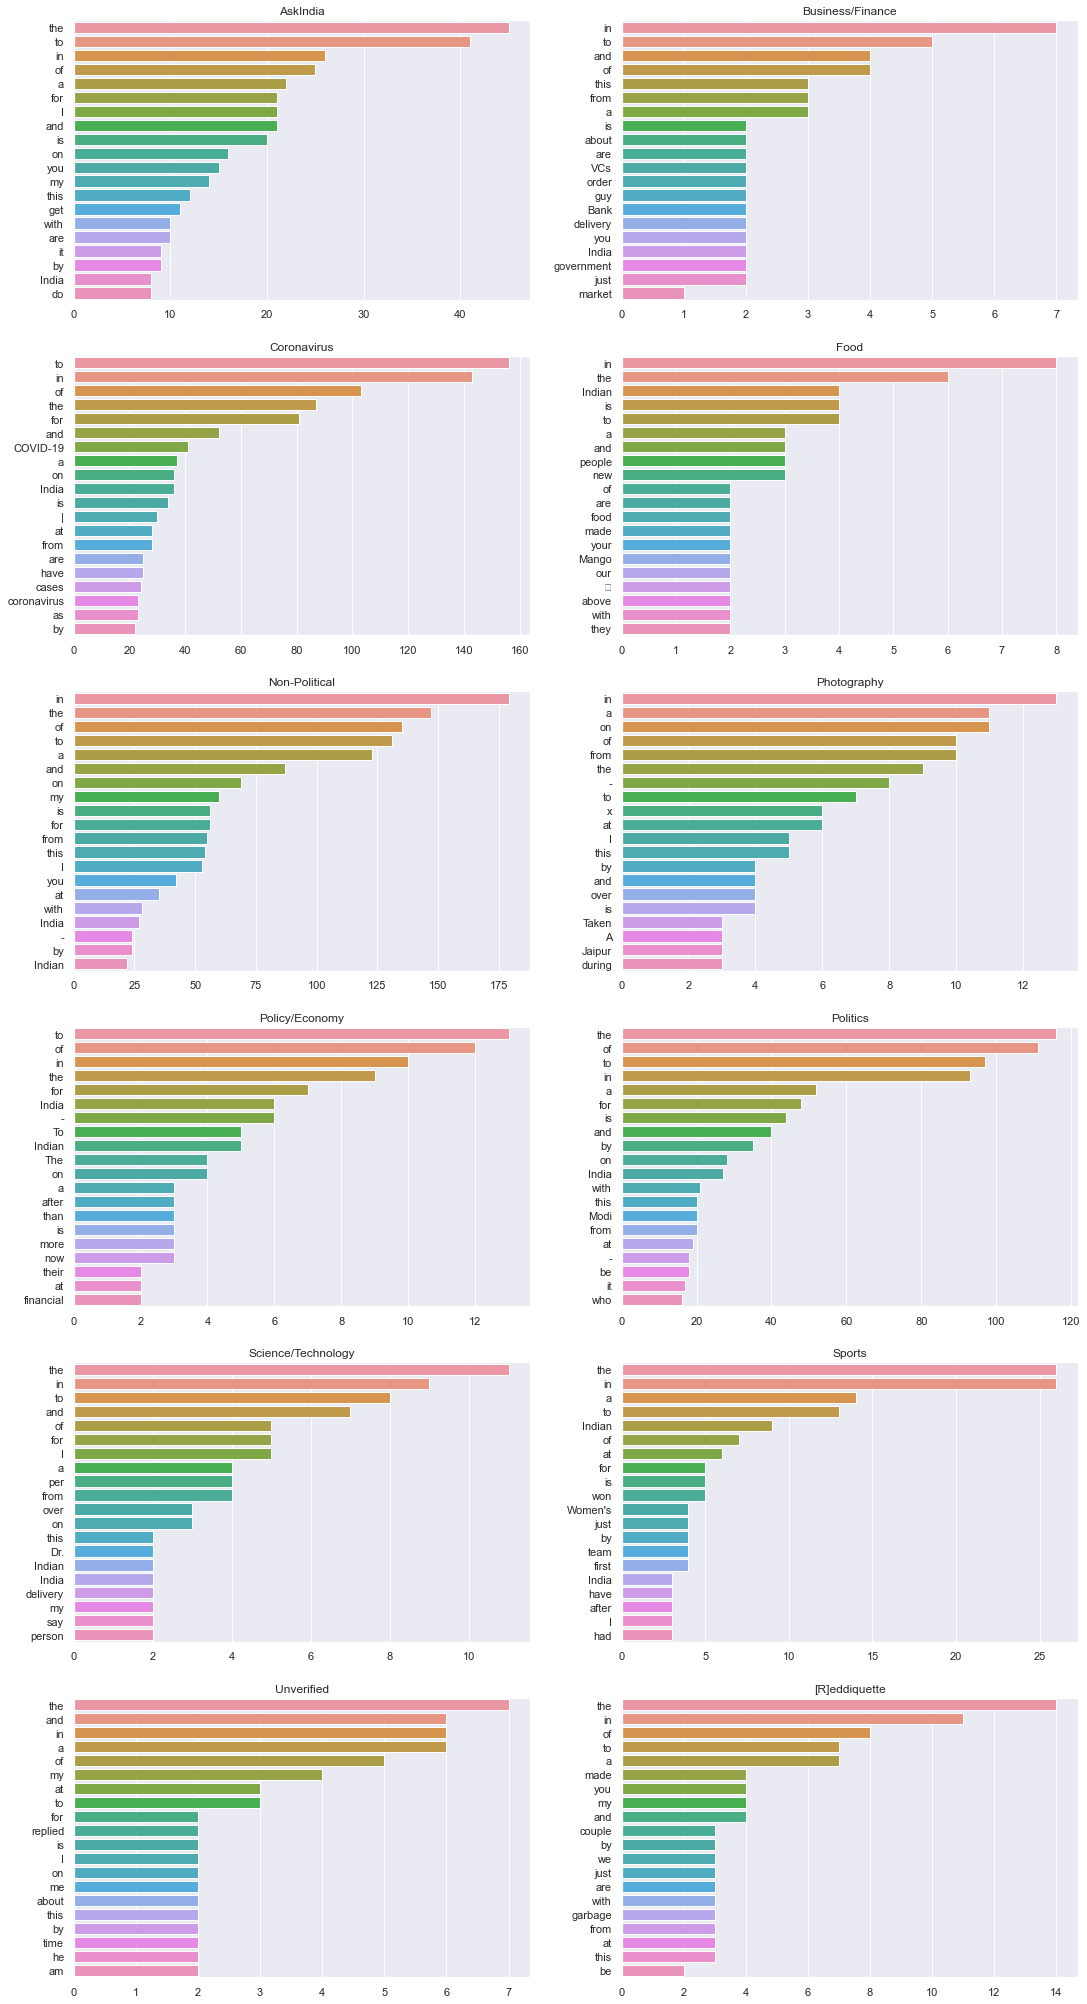

In [154]:
flair_all_words=df.groupby('Flair').agg({'Title':sum})
plt.figure(0,figsize=(18,36))
for i in range(len(flair_all_words)):
    plt.subplot(6,2,i+1)
    plt.title(flair_all_words.index[i])
    ix,iy= np.unique(str(flair_all_words['Title'][i]).split(),return_counts=True)
    iy_ind=np.argsort(-iy)
    sns.barplot(iy[iy_ind[:20]],ix[iy_ind[:20]])

plt.show()
#     break